**IMPORTING LIBRARIES**

In [4]:
import matplotlib.pyplot as plt
import cv2
import os

In [15]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

**CHECKING IMAGES FOR CONFIRMATION**

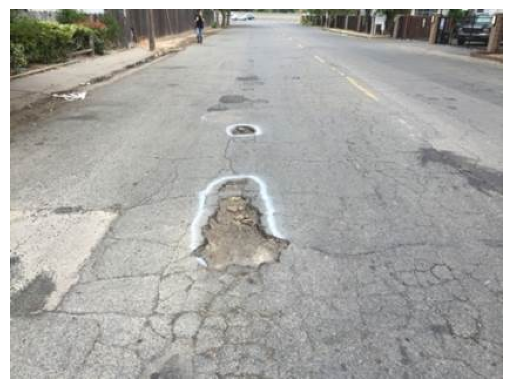

In [13]:
import cv2
import matplotlib.pyplot as plt

# Read the image
image_path = "pothole-detection-dataset/potholes/125.jpg"
image = cv2.imread(image_path)

# Check if the image was loaded successfully
if image is None:
    print(f"Error: Unable to load image at {image_path}")
else:
    # Convert BGR to RGB for correct color display in matplotlib
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image_rgb)
    plt.axis('off')  # Hide axes for better visualization
    plt.show()

**Part 1 - Data Preprocessing**


****Splitting dataset into training and validation and preprocessing the training set****

In [ ]:
import tensorflow as tf

In [28]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,
                                   validation_split=0.2)
training_set = train_datagen.flow_from_directory('pothole-detection-dataset/potholes',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary',
                                                 subset="training")

Found 0 images belonging to 0 classes.


**Preprocessing the validation set**

In [29]:
validation_generator = train_datagen.flow_from_directory(
    "pothole-detection-dataset", # same directory as training data
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary',
    subset='validation')

Found 135 images belonging to 2 classes.


**Part 2 - Building the CNN**


**Initialising the CNN**

In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
cnn = Sequential()